In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.datasets import cifar10

In [2]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 54s 0us/step


In [3]:
NUM_CLASSES = 10

In [5]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [10]:
## Model Creation Starts Here

In [11]:
# Sequential Model
from keras.models import Sequential
from keras.layers import Flatten, Dense

In [13]:
modelSeq = Sequential([
    Dense(200, activation='relu', input_shape=(32,32,3)),
    Flatten(),
    Dense(150, activation='relu'),
    Dense(10, activation='softmax'),
])

In [14]:
# Functional API Model
from keras.layers import Input,Flatten,Dense
from keras.models import Model

In [20]:
input_layer = Input(shape=(32,32,3))
x = Flatten()(input_layer)
x = Dense(units=200, activation='relu')(x)
x = Dense(units=150, activation='relu')(x)

output_layer = Dense(units=10,activation='softmax')(x)

modelFunc = Model(input_layer, output_layer)

In [21]:
modelSeq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32, 32, 200)       800       
                                                                 
 flatten_1 (Flatten)         (None, 204800)            0         
                                                                 
 dense_3 (Dense)             (None, 150)               30720150  
                                                                 
 dense_4 (Dense)             (None, 10)                1510      
                                                                 
Total params: 30,722,460
Trainable params: 30,722,460
Non-trainable params: 0
_________________________________________________________________


In [22]:
modelFunc.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_13 (Dense)            (None, 200)               614600    
                                                                 
 dense_14 (Dense)            (None, 150)               30150     
                                                                 
 dense_15 (Dense)            (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.optimizers import Adam

optm = Adam(learning_rate=0.0005)
modelSeq.compile(loss='categorical_crossentropy', optimizer=optm, metrics=['accuracy'])

In [26]:
modelSeq.fit(x_train,
            y_train,
            batch_size=32,
            epochs=10,
            shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 180s 115ms/step - loss: 2.1691 - accuracy: 0.2039
Epoch 2/10
1563/1563 [==============================] - 176s 113ms/step - loss: 2.0294 - accuracy: 0.2739
Epoch 3/10
1563/1563 [==============================] - 176s 113ms/step - loss: 1.9679 - accuracy: 0.3030
Epoch 4/10
1563/1563 [==============================] - 176s 113ms/step - loss: 1.9060 - accuracy: 0.3276
Epoch 5/10
1563/1563 [==============================] - 176s 113ms/step - loss: 1.8473 - accuracy: 0.3457
Epoch 6/10
1563/1563 [==============================] - 176s 112ms/step - loss: 1.8001 - accuracy: 0.3627
Epoch 7/10
1563/1563 [==============================] - 177s 113ms/step - loss: 1.7675 - accuracy: 0.3718
Epoch 8/10
1563/1563 [==============================] - 176s 113ms/step - loss: 1.7399 - accuracy: 0.3818
Epoch 9/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.7186 - accuracy: 0.3915
Epoch 10/10
1563/1563 [=======================

In [28]:
modelSeq.evaluate(x_test, y_test)

313/313 [==============================] - 7s 22ms/step - loss: 286.8768 - accuracy: 0.2758


[286.8768005371094, 0.2757999897003174]

In [29]:
CLASSES = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds = modelSeq.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
preds_single = CLASSES[np.argmax(preds, axis=-1)]

313/313 [==============================] - 7s 22ms/step


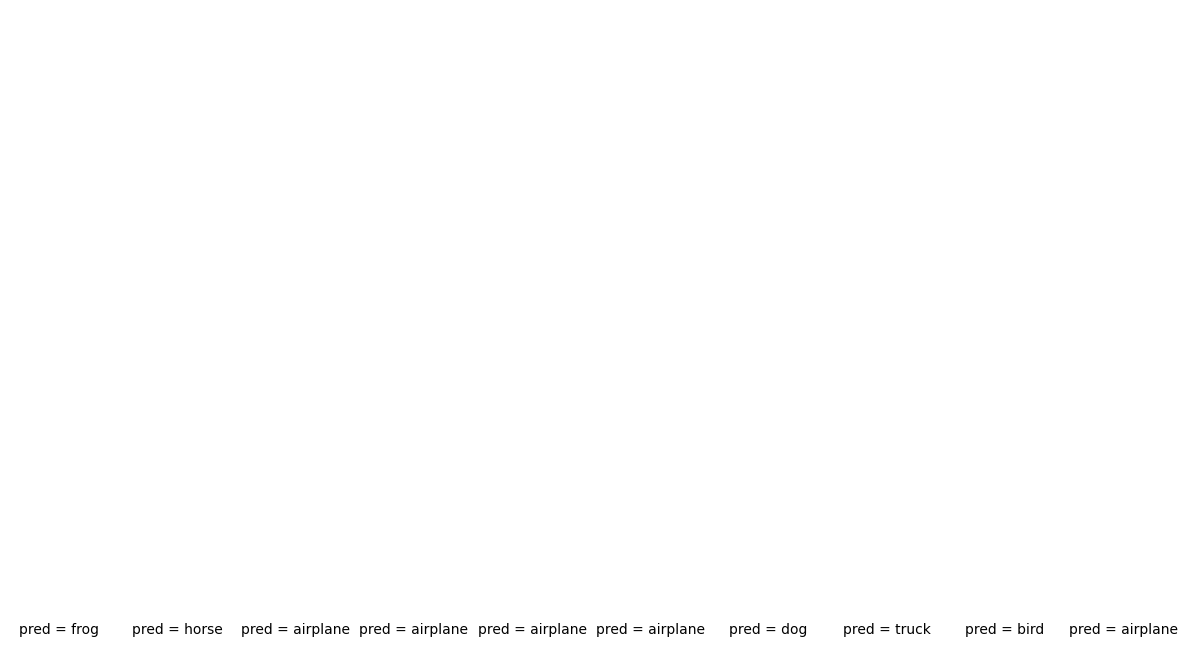

In [37]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15,6))
# fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i,idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1,n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)